# Maryland Crash Data Exploration
Data cleaning done to update bike stress data for the City of College Park.

In [279]:
# Import modules
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import datetime
import math
from dateutil.relativedelta import relativedelta

## Loading raw data

In [280]:
original_dataset = pd.read_csv('data/original_data_2019_2024.csv')# Load original data
non_motorists_raw = pd.read_csv('data/Crash_NonMotorists_data_raw.csv') #Crash data for non-motorists
general_crash_data = pd.read_csv('data/Crash_Reports_data_raw.csv') #Crash data for general cases
non_motorists_raw.head(5)

,Crash Severity Description,Reportnumber,Type NM Description,PersonID NM,ActionPriorToCrash NM,ActionPriorToCrash NM Description,Age NM,City NM,ContactPoint NM,ContactPoint NM Description,...,Location NM,Location NM Description,OriginDestination NM,OriginDestination NM Description,ReportNumber NM,State NM,StruckByVehID NM,Type NM,Unknown NM,ZipCode NM
0,Fatal Crashes,MSP5121000P,Pedestrian,02180e97-d5ec-42e4-ba4e-a6c7800dc4e2,0,NaN,33,RIVERDALE,3,Right,...,6,Shoulder/Roadside,97,Not Applicable,MSP5121000P,MD,bbdd958f-b482-420a-a0fa-577fc684ea97,6,N,20737
1,Fatal Crashes,DA36550097,Pedestrian,af7f440b-b3ad-4a72-afe0-ee8c8abb8890,100,Cross/Enter at Intersection,74,BLADENSBURG,9,Left,...,1,Intersection – Marked Crosswalk,97,Not Applicable,DA36550097,MD,79108605-d5b5-4094-8da0-b0b39620a0d9,6,N,20710
2,Fatal Crashes,MSP556300B5,Pedestrian,b70c203f-7e57-42d8-9fb7-5c34666a8883,101,Cross/Enter Not at Intersection,23,WASHINGTON DC,99,Unknown,...,7,Travel Lane – Other Location,97,Not Applicable,MSP556300B5,DC,dae1b869-ac45-4a9f-a36e-54c59b1f8afd,6,N,20002
3,Injury Crashes,DA4401000X,Scooter (electric),2c9274ab-5c85-49b1-a34d-f942e33eca52,100,Cross/Enter at Intersection,47,SUITLAND,3,Right,...,2,Intersection – Unmarked Crosswalk,97,Not Applicable,DA4401000X,MD,19f78585-43a9-4e22-8f37-c21e7a740e6b,102,N,20746
4,Injury Crashes,MSP718600HV,Occupant of Motor Vehicle Not in Transport,36bac7ee-97ab-404f-8d44-a40dc64e321e,98,Other,36,DISTRICT HEIGHTS,3,Right,...,98,Other,97,Not Applicable,MSP718600HV,MD,bac96c16-5899-41a4-acf4-6c41b70b4acb,103,N,20747


In [281]:
general_crash_data.head(5) #Will get the lat/lon data from this dataset

,Crash Severity Description,Reportnumber,Agencyname,CollisionImpact Description,Crash County Description,FunctionalClass Description,ImpairedCrash,Large Vehicle Involved,Motorcycle Crash,Non-Motorist Crash,...,Surface,Surface Description,TrafficControl,Trafficcontrol Description,WZLawEnforcementPresent,WZLocation,WZLocation Description,WZType,WZType Description,WZWorkersPresent
0,Property Damage Crashes,DA37150090,Prince George's County Police,Other,Prince George's,NaN,No,No,No,No,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Injury Crashes,MSP757700KS,Maryland State Police,"Sideswipe, Same Direction",Prince George's,Interstate,No,No,No,No,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Property Damage Crashes,DA4354003S,Prince George's County Police,Angle,Prince George's,Local,No,No,No,No,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Property Damage Crashes,CBPD00920043,Bowie Police Department,Front to Rear,Prince George's,Minor Collector,No,No,No,No,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Property Damage Crashes,DA4370001R,Prince George's County Police,Single Vehicle,Prince George's,NaN,No,No,No,No,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
general_crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crash Severity Description      7485 non-null   object 
 1   Reportnumber                    7485 non-null   object 
 2   Agencyname                      7485 non-null   object 
 3   CollisionImpact Description     7485 non-null   object 
 4   Crash County Description        7485 non-null   object 
 5   FunctionalClass Description     6264 non-null   object 
 6   ImpairedCrash                   7485 non-null   object 
 7   Large Vehicle Involved          7485 non-null   object 
 8   Motorcycle Crash                7485 non-null   object 
 9   Non-Motorist Crash              7485 non-null   object 
 10  OffRoad                         7485 non-null   object 
 11  RoadName                        6247 non-null   object 
 12  Route Number                    68

## Cleaning data

In [283]:
non_motorist_tidy = non_motorists_raw.merge(general_crash_data, on='Reportnumber', how='left')
non_motorist_tidy.head(5)

,Crash Severity Description_x,Reportnumber,Type NM Description,PersonID NM,ActionPriorToCrash NM,ActionPriorToCrash NM Description,Age NM,City NM,ContactPoint NM,ContactPoint NM Description,...,Surface,Surface Description,TrafficControl,Trafficcontrol Description,WZLawEnforcementPresent,WZLocation,WZLocation Description,WZType,WZType Description,WZWorkersPresent
0,Fatal Crashes,MSP5121000P,Pedestrian,02180e97-d5ec-42e4-ba4e-a6c7800dc4e2,0,NaN,33,RIVERDALE,3,Right,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fatal Crashes,DA36550097,Pedestrian,af7f440b-b3ad-4a72-afe0-ee8c8abb8890,100,Cross/Enter at Intersection,74,BLADENSBURG,9,Left,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fatal Crashes,MSP556300B5,Pedestrian,b70c203f-7e57-42d8-9fb7-5c34666a8883,101,Cross/Enter Not at Intersection,23,WASHINGTON DC,99,Unknown,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Injury Crashes,DA4401000X,Scooter (electric),2c9274ab-5c85-49b1-a34d-f942e33eca52,100,Cross/Enter at Intersection,47,SUITLAND,3,Right,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Injury Crashes,MSP718600HV,Occupant of Motor Vehicle Not in Transport,36bac7ee-97ab-404f-8d44-a40dc64e321e,98,Other,36,DISTRICT HEIGHTS,3,Right,...,1.0,Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
#Clean tidy dataset
non_motorist_tidy.columns = non_motorist_tidy.columns.str.strip()
non_motorist_tidy.columns = non_motorist_tidy.columns.str.replace(" ", "_")
#Clean original dataset
original_dataset.columns = original_dataset.columns.str.strip()
original_dataset.columns = original_dataset.columns.str.replace(" ", "_")


In [285]:
non_motorist_tidy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Crash_Severity_Description_x       205 non-null    object 
 1   Reportnumber                       205 non-null    object 
 2   Type_NM_Description                205 non-null    object 
 3   PersonID_NM                        205 non-null    object 
 4   ActionPriorToCrash_NM              205 non-null    int64  
 5   ActionPriorToCrash_NM_Description  193 non-null    object 
 6   Age_NM                             205 non-null    int64  
 7   City_NM                            205 non-null    object 
 8   ContactPoint_NM                    205 non-null    int64  
 9   ContactPoint_NM_Description        205 non-null    object 
 10  DistractedByAction_NM              205 non-null    int64  
 11  DistractedByAction_NM_Description  205 non-null    object

### Classes of non-motorists

In [286]:
for i in non_motorist_tidy["Type_NM_Description"].unique():
    print('*' + i + '\n')

*Pedestrian

*Scooter (electric)

*Occupant of Motor Vehicle Not in Transport

*Unknown Type Of Non-Motorist

*Cyclist (Electric)

*Cyclist (non-electric)

*Occupant Of a Non-Motor Vehicle Transportation Device

*Unknown

*Scooter (non-Electric)

*Other Pedestrian (person in a building, skater, personal conveyance, etc.)



We will use:
* Scooter (electric)
* Cyclist (Electric)
* Cyclist (non-electric)
* Scooter (non-Electric)

In [287]:
# Create list of desired classes
non_motorists_classes = ['Unknown Type Of Non-Motorist','Unknown'] #Values to exclude
#Use list to filter dataframe
non_motorist_tidy = non_motorist_tidy[~non_motorist_tidy['Type_NM_Description'].isin(non_motorists_classes)] #Filter by list values

## Finalize tidy data
Redefine column names and plot geographic data.

In [288]:
gdf = geopandas.GeoDataFrame(
    non_motorist_tidy, geometry=geopandas.points_from_xy(non_motorist_tidy.Longitude, non_motorist_tidy.Latitude), crs="EPSG:4326"
)

In [289]:
cp = geopandas.read_file("data/boundaries/College_Park_City_Limits.shp")
cp = cp.to_crs(4326)
cp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

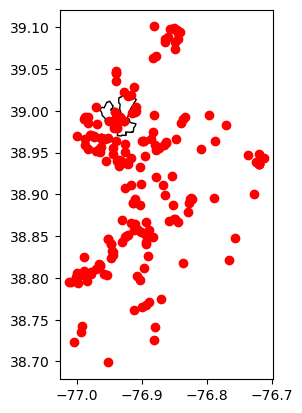

In [290]:
ax = cp.plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

plt.show()

### Clip crash data to College Park boundaries

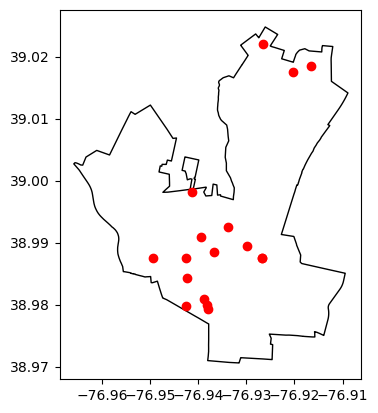

In [291]:
cp_non_motorists_crash = geopandas.clip(gdf, cp)
ax = cp.plot(color="white", edgecolor="black")
cp_non_motorists_crash.plot(ax=ax, color="red")

plt.show()

## Harmonize data with current dataset

In [292]:
original_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 112 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    Reportnumber                     object 
 1    AgencyCode                       object 
 2    Reporttype                       object 
 3    Crashdate                        object 
 4    Latitude                         float64
 5    Longitude                        float64
 6    Collisiontype                    object 
 7    Fixedobjectstruck                object 
 8    Harmfuleventone                  object 
 9    Harmfuleventtwo                  object 
 10   Interchangearea                  object 
 11   Intersectiontype                 object 
 12   Junction                         object 
 13   Lanedirection                    object 
 14   Lanenumber                       float64
 15   Lanetype                         object 
 16   Lighting                         object 
 

In [293]:
cp_non_motorists_crash.info(verbose = True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17 entries, 151 to 191
Data columns (total 101 columns):
 #    Column                             Dtype   
---   ------                             -----   
 0    Crash_Severity_Description_x       object  
 1    Reportnumber                       object  
 2    Type_NM_Description                object  
 3    PersonID_NM                        object  
 4    ActionPriorToCrash_NM              int64   
 5    ActionPriorToCrash_NM_Description  object  
 6    Age_NM                             int64   
 7    City_NM                            object  
 8    ContactPoint_NM                    int64   
 9    ContactPoint_NM_Description        object  
 10   DistractedByAction_NM              int64   
 11   DistractedByAction_NM_Description  object  
 12   DistractedBySource                 float64 
 13   DistractedBySource_Description     object  
 14   Gender_NM                          object  
 15   IncidentResponder_NM              

In [294]:
#Reorder variables based on original dataset
#Create a dictionary pairing variables from both datasets
name_pairs = {
    'Crash_Severity_Description_x':'Reporttype',
    'Reportnumber':'Reportnumber',
    'Type_NM_Description':'Harmfuleventone',
    'PersonID_NM':'NonMotoristID',
    'ActionPriorToCrash_NM_Description':'ActionPriorToCrash_NM_Descripti',
    'Age_NM':'Age_NM',
    'City_NM':'City_NM',
    'ContactPoint_NM':'ContactPoint_NM',
    'ContactPoint_NM_Description':'ContactPoint_NM_Description',
    'DistractedByAction_NM_Description':'DistractedByAction_NM_Descripti',
    'DistractedBySource_Description':'DistractedBySource_Description',
    'Gender_NM':'Gender_NM',
    'IncidentResponder_NM_Description':'IncidentResponder_NM_Descriptio',
    'InjuryStatus_NM_Description':'InjuryStatus_NM_Description',
    'Location_NM_Description':'Location_NM_Description',
    'OriginDestination_NM_Description':'OriginDestination_NM_Descriptio',
    'ReportNumber_NM':'ReportNumber_NM',
    'State_NM':'State_NM',
    'StruckByVehID_NM':'StruckByVehID_NM',
    'ZipCode_NM':'ZipCode_NM',
    'Agencyname':'AgencyCode',
    'CollisionImpact_Description':'Collisiontype',
    'Crash_County_Description':'Crash_County_Description',
    'FunctionalClass_Description':'FunctionalClass_Description',
    'ImpairedCrash':'ImpairedCrash',
    'Non-Motorist_Crash':'Non_Motorist_Crash',
    'AgencyCode':'AgencyID',
    'MilepointDirection':'Milepointdirection',
    'MilepointDistance':'Milepointdistance',
    'MilepointUnits':'Milepointdistanceunits',
    'RouteType_Description':'Reference_Route_Type',
}

In [295]:
cp_non_motorists_crash.rename(columns=name_pairs, inplace=True)
cp_non_motorists_crash = cp_non_motorists_crash.drop(['Crash_Severity_Description_y','Surface','geometry'],axis=1)
cp_non_motorists_crash.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 151 to 191
Data columns (total 98 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reporttype                       17 non-null     object 
 1   Reportnumber                     17 non-null     object 
 2   Harmfuleventone                  17 non-null     object 
 3   NonMotoristID                    17 non-null     object 
 4   ActionPriorToCrash_NM            17 non-null     int64  
 5   ActionPriorToCrash_NM_Descripti  17 non-null     object 
 6   Age_NM                           17 non-null     int64  
 7   City_NM                          17 non-null     object 
 8   ContactPoint_NM                  17 non-null     int64  
 9   ContactPoint_NM_Description      17 non-null     object 
 10  DistractedByAction_NM            17 non-null     int64  
 11  DistractedByAction_NM_Descripti  17 non-null     object 
 12  DistractedBySource        

C:\Users\pmedina\AppData\Local\Temp\ipykernel_19268\725043127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_non_motorists_crash.rename(columns=name_pairs, inplace=True)


In [296]:
cp_non_motorists_crash.head(5)

,Reporttype,Reportnumber,Harmfuleventone,NonMotoristID,ActionPriorToCrash_NM,ActionPriorToCrash_NM_Descripti,Age_NM,City_NM,ContactPoint_NM,ContactPoint_NM_Description,...,SecondHarmLocation_Description,Surface_Description,TrafficControl,Trafficcontrol_Description,WZLawEnforcementPresent,WZLocation,WZLocation_Description,WZType,WZType_Description,WZWorkersPresent
151,Property Damage Crashes,DA418100FM,Pedestrian,317a45d2-8686-402e-8e7a-2332af347ad0,100,Cross/Enter at Intersection,19,WASHINGTON,9,Left,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Injury Crashes,DS0502000S,Pedestrian,ad5ad3c1-6499-469a-ad36-03f341e168f8,100,Cross/Enter at Intersection,30,COLLEGE PARK,12,Front,...,NaN,Dry,2.0,Stop - All Way,NaN,NaN,NaN,NaN,NaN,NaN
27,Injury Crashes,DS0516000N,Pedestrian,c231feb9-7ad4-4105-b8fa-18663d8129bb,7,Walking/Cycling on Sidewalk,25,ATLANTA,99,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Injury Crashes,DS0499000J,Pedestrian,e44a41d7-c16b-4e61-aec5-590bde545677,101,Cross/Enter Not at Intersection,19,ROCKVILLE,12,Front,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Property Damage Crashes,DS0454000J,Pedestrian,664a314a-8b69-47af-bea6-3b0f2fa87202,102,Standing,39,STEVENSVILLE,9,Left,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
cp_non_motorists_crash_merged = pd.concat([original_dataset, cp_non_motorists_crash], ignore_index=True)
cp_non_motorists_crash_merged.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 151 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    Reportnumber                     object 
 1    AgencyCode                       object 
 2    Reporttype                       object 
 3    Crashdate                        object 
 4    Latitude                         float64
 5    Longitude                        float64
 6    Collisiontype                    object 
 7    Fixedobjectstruck                object 
 8    Harmfuleventone                  object 
 9    Harmfuleventtwo                  object 
 10   Interchangearea                  object 
 11   Intersectiontype                 object 
 12   Junction                         object 
 13   Lanedirection                    object 
 14   Lanenumber                       float64
 15   Lanetype                         object 
 16   Lighting                         object 
 

In [298]:
# Look for duplicate column names
seen = set()
# A list to store duplicates found in the input list
duplicates = []

# Iterate over each element in the list
for i in list(cp_non_motorists_crash_merged.columns):
    if i in seen:
        duplicates.append(i)
    else:
        seen.add(i)

print(duplicates)

[]


In [299]:
cp_non_motorists_crash_merged.tail(5)

,Reportnumber,AgencyCode,Reporttype,Crashdate,Latitude,Longitude,Collisiontype,Fixedobjectstruck,Harmfuleventone,Harmfuleventtwo,...,OffroadLocation_Description,RoadID,SchoolBusRelated,SecondHarmEvent,SecondHarmLocation,TrafficControl,WZLawEnforcementPresent,WZLocation,WZLocation_Description,WZType
222,DA405100DC,Prince George's County Police,Injury Crashes,2/14/2025,38.992548,-76.933889,Single Vehicle,NaN,Scooter (electric),NaN,...,Alley,NaN,1.0,14.0,4.0,NaN,NaN,NaN,NaN,NaN
223,DS02420025,University of Maryland Police College Park,Injury Crashes,4/25/2025,38.998150,-76.941200,Single Vehicle,NaN,Cyclist (non-electric),NaN,...,NaN,198336381BAF1439B85C419AA39BDC63CE76687BA480E9...,1.0,97.0,NaN,3.0,NaN,NaN,NaN,NaN
224,DA3476004J,Prince George's County Police,Property Damage Crashes,1/3/2025,39.017438,-76.920307,Single Vehicle,NaN,Pedestrian,NaN,...,NaN,A9FAE2E07A21EF1CE07E31EAE62A7529FC0E8D1AC1FE8D...,1.0,14.0,5.0,2.0,NaN,NaN,NaN,NaN
225,MSP635700VY,Maryland State Police,Fatal Crashes,5/5/2025,39.018453,-76.916567,Single Vehicle,NaN,Pedestrian,NaN,...,NaN,6C31E563FDEBF9C2FBDAF2BF52F0FCA82A7299773B8287...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,DA43790019,Prince George's County Police,Injury Crashes,1/30/2025,39.022078,-76.926534,Single Vehicle,NaN,Pedestrian,NaN,...,NaN,8FDCB3C40856B5E983C2176D53782A62D02BF3B8384D65...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
#Convert NM DOB and Crash date to date type
cp_non_motorists_crash_merged['NonMotoristDOB'] = pd.to_datetime(cp_non_motorists_crash_merged.NonMotoristDOB, format="%m/%d/%Y")
cp_non_motorists_crash_merged['Crashdate'] = pd.to_datetime(cp_non_motorists_crash_merged.Crashdate, format="%m/%d/%Y")
#If Non motorists age is empty, calculate based on DOB and Crash date
#cp_non_motorists_crash_merged['Age_NM'] = round((cp_non_motorists_crash_merged['Crashdate'] - cp_non_motorists_crash_merged['NonMotoristDOB']).dt.days / 365, 1)


In [301]:
for index, row in cp_non_motorists_crash_merged.iterrows():
    if math.isnan(row['Age_NM']):
        new_age = [round((row['Crashdate'] - row['NonMotoristDOB']).days / 365, 0)]
        cp_non_motorists_crash_merged.loc[index, 'Age_NM'] = new_age
    else:
        row['Age_NM']

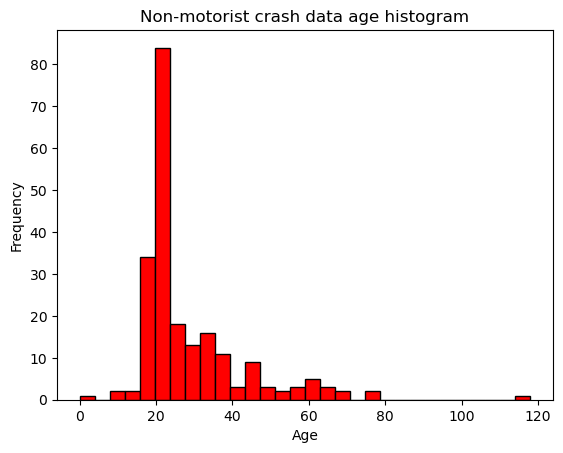

In [311]:
# Exploring ages
plt.hist(cp_non_motorists_crash_merged['Age_NM'], bins=30, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Non-motorist crash data age histogram')

# Display the plot
plt.show()

In [303]:
cp_non_motorists_crash_merged.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 151 columns):
 #    Column                           Dtype         
---   ------                           -----         
 0    Reportnumber                     object        
 1    AgencyCode                       object        
 2    Reporttype                       object        
 3    Crashdate                        datetime64[ns]
 4    Latitude                         float64       
 5    Longitude                        float64       
 6    Collisiontype                    object        
 7    Fixedobjectstruck                object        
 8    Harmfuleventone                  object        
 9    Harmfuleventtwo                  object        
 10   Interchangearea                  object        
 11   Intersectiontype                 object        
 12   Junction                         object        
 13   Lanedirection                    object        
 14   Lanenumber              

In [304]:
cp_non_motorists_crash_merged.tail(5)

,Reportnumber,AgencyCode,Reporttype,Crashdate,Latitude,Longitude,Collisiontype,Fixedobjectstruck,Harmfuleventone,Harmfuleventtwo,...,OffroadLocation_Description,RoadID,SchoolBusRelated,SecondHarmEvent,SecondHarmLocation,TrafficControl,WZLawEnforcementPresent,WZLocation,WZLocation_Description,WZType
222,DA405100DC,Prince George's County Police,Injury Crashes,2025-02-14,38.992548,-76.933889,Single Vehicle,NaN,Scooter (electric),NaN,...,Alley,NaN,1.0,14.0,4.0,NaN,NaN,NaN,NaN,NaN
223,DS02420025,University of Maryland Police College Park,Injury Crashes,2025-04-25,38.998150,-76.941200,Single Vehicle,NaN,Cyclist (non-electric),NaN,...,NaN,198336381BAF1439B85C419AA39BDC63CE76687BA480E9...,1.0,97.0,NaN,3.0,NaN,NaN,NaN,NaN
224,DA3476004J,Prince George's County Police,Property Damage Crashes,2025-01-03,39.017438,-76.920307,Single Vehicle,NaN,Pedestrian,NaN,...,NaN,A9FAE2E07A21EF1CE07E31EAE62A7529FC0E8D1AC1FE8D...,1.0,14.0,5.0,2.0,NaN,NaN,NaN,NaN
225,MSP635700VY,Maryland State Police,Fatal Crashes,2025-05-05,39.018453,-76.916567,Single Vehicle,NaN,Pedestrian,NaN,...,NaN,6C31E563FDEBF9C2FBDAF2BF52F0FCA82A7299773B8287...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,DA43790019,Prince George's County Police,Injury Crashes,2025-01-30,39.022078,-76.926534,Single Vehicle,NaN,Pedestrian,NaN,...,NaN,8FDCB3C40856B5E983C2176D53782A62D02BF3B8384D65...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
cp_non_motorists_crash_merged.to_csv('data/Non_Motorist_Crashes_College_Park_2019_thru_May_2025.csv')